### Student Information
Name:王聿峰

Student ID:110030751

GitHub ID:phocion1109

Kaggle name:test123

Kaggle private scoreboard snapshot:
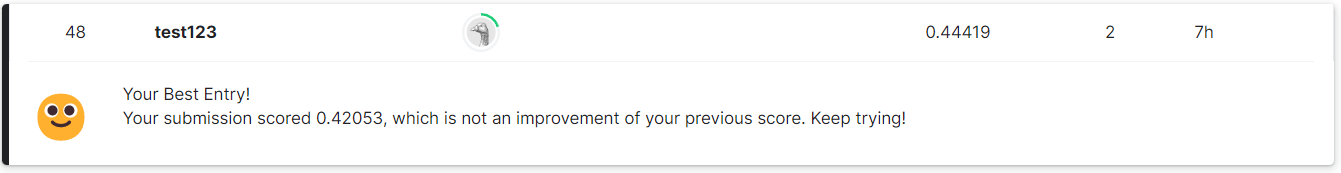

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 27th 11:59 pm, Friday)__. 

# Lab2 Take Home Exercise
Please see the link: https://github.com/phocion1109/DM2022-Lab2-Homework/blob/main/DM2022-Lab2-Master.ipynb

# Report
## 1. Data Preparation
1.1 Load data  
Step 1. read all jaon files and transform to dataframe by 'pd.read_json'. The tiles are "hashtags", "tweet_id", "text".  
Step 2. Combine data_identification with dataframe by 'pd.merge', and seperate training dataset and testing dataset.  
Step 3. Combine emotions to training dataset by 'pd.merge' as well.  
  
1.2 Save Data  
save as pickle so next time we don't need to load data again. 
  
1.3 EDA  
To check the ration of each emotion.

## 2. Feature Engineering
Step 1. train/val split  
in order to make sure our model is imporving, we need a validation dataset. So I use train test split to seperate them. The ratio of train:val = 8:2.  
  
Step 2. Extract features  
I immitate the Lab2 master first. Use BOW and nltk tokenizer to do phrasing, and use simple model to see it's result.    
The same as Lab2 master, nltk's result is better then BOW, so next step I use nltk tokenizer to do TFIDF.  
  
Step 3. TFIDF  
Next I do TFIDF to find out some important words which are helpful to predict the emotions. Because the words are pretty much, I sort the higheet 2000 and 20000 words. Use logistic regression to classify. The result shows the more TFIDF words we chose, the higher validation accuracy we got. 

## 3. Models  
The first part is to extract features from X_train, ex. BOW, NLTK, TFIDF.   
  
Next is trying different classifiers, includes:
1. **Decision Tree**  
The training accuracy of Decision Tree could be very high. However, the validation data is low. It's might because of overfitting.
2. **Naive Bayes**   
The accuracy of Naive Bayes is lower than Decision Tree, not very out standing.
3. **Random Forest**  
Random forest combines the results from different tree. I think the performance is obviously influenced by the distribution of each emotions. Unbalance distribution will cause worse result. Take this case for example, "joy" class take a high percentage of training data (We can observe from EDA part). So every tree are easily to predict the text as "joy". When we combine those trees as commitee, "joy" result will be the most and become the final result. Thus, the results are almost "joy" in every case.
4. **Logistic Regression**  
Next I try a differnt Logistic regression. This model is recommended by a paper. After experiences, it's much higher than previous 3 models. I also increase the TFIDF feature from 2000 to 20000. The results become better and better. I stop at 20000 features due to the limitation of computational resource.  
5. **Deep Learning**  
Finally I tried a common classifer: neural network. From the previous result, we can said the more feature the better. Thus, I chose 20000 TFIDF features as the input, and tuning the networks. Finally I use 3 hidden layers. The size are (254, 64, 16). Training epochs is 100. After uploading to Kaggle, the testing result is 0.44419.

## 4. Evaluation 
This part is evaluate the validation result. I draw the confusion matrix to see the predicted result.  
Notice that due to the unbalance dataset, the color of "joy" column is deeper than the others, but it doesn't mean other predictions are bad. We still need to see the numbers in the grid.

## 5. Output the result
Finally is using the trained model to predict testing dataset, and output as csv file. Then we can directly upload it to Kaggle and see the result.   
